H1B Visa Petition Analysis

In [1]:
'''
Import the required packages and load data file into dataframe
'''

import numpy as np
import pandas as pd
import pickle
from sklearn import feature_extraction, metrics, model_selection, preprocessing 
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv("h1b_kaggle.csv")
df = df.rename(columns={'Unnamed: 0': 'ID'})
print("DF Shape = ", df.shape)
df.dtypes

DF Shape =  (3002458, 11)


ID                      int64
CASE_STATUS            object
EMPLOYER_NAME          object
SOC_NAME               object
JOB_TITLE              object
FULL_TIME_POSITION     object
PREVAILING_WAGE       float64
YEAR                  float64
WORKSITE               object
lon                   float64
lat                   float64
dtype: object

In [2]:
'''
Get count of null values in all columns
'''

df.isnull().sum()

ID                         0
CASE_STATUS               13
EMPLOYER_NAME             59
SOC_NAME               17734
JOB_TITLE                 43
FULL_TIME_POSITION        15
PREVAILING_WAGE           85
YEAR                      13
WORKSITE                   0
lon                   107242
lat                   107242
dtype: int64

In [3]:
'''
Preprocessing and cleaning the data
'''

df['FULL_TIME_POSITION'] = np.where(df['FULL_TIME_POSITION']=="Y", 1, 0)
df = df.drop(['lon', 'lat'], axis=1)
df = df.dropna(subset=['JOB_TITLE'])
df['YEAR'] = df['YEAR'].astype(int)
print("DF Shape = ", df.shape)

DF Shape =  (3002415, 9)


In [4]:
'''
Get count of null values in all columns
'''

df.isnull().sum()

ID                        0
CASE_STATUS               0
EMPLOYER_NAME            37
SOC_NAME              17708
JOB_TITLE                 0
FULL_TIME_POSITION        0
PREVAILING_WAGE          68
YEAR                      0
WORKSITE                  0
dtype: int64

In [5]:
'''
Get count of unique values in SOC_NAME and JOB_TITLE columns
'''

print("Unique Job Titles = ", len(df['JOB_TITLE'].unique()))
print("Unique SOC Names = ", len(df['SOC_NAME'].unique()))

Unique Job Titles =  287549
Unique SOC Names =  2133


In [6]:
'''
Selecting only rows in the dataframe with CASE_STATUS as 'CERTIFIED'
'''

df = df.loc[df['CASE_STATUS'] == 'CERTIFIED']
df = df.drop(['CASE_STATUS'], axis=1)
print("DF Shape = ", df.shape)

DF Shape =  (2615620, 8)


In [7]:
'''
Get count of null values in all columns
'''

df.isnull().sum()

ID                        0
EMPLOYER_NAME            11
SOC_NAME              15368
JOB_TITLE                 0
FULL_TIME_POSITION        0
PREVAILING_WAGE           0
YEAR                      0
WORKSITE                  0
dtype: int64

In [8]:
'''
Reset index after data cleaning
'''

df = df.drop(['ID'], axis=1)
df = df.reset_index(drop=True)
print("DF Shape = ", df.shape)

DF Shape =  (2615620, 7)


In [9]:
'''
Get count of unique values in SOC_NAME and JOB_TITLE columns
'''

print("Unique Job Titles = ", len(df['JOB_TITLE'].unique()))
print("Unique SOC Names = ", len(df['SOC_NAME'].unique()))

Unique Job Titles =  272793
Unique SOC Names =  1987


In [10]:
soc_null = df[pd.isnull(df['SOC_NAME'])]
print("soc_null shape = ", soc_null.shape)
soc_null

soc_null shape =  (15368, 7)


,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE
569643,"SIGMAWAYS, INC",NaN,SYSTEMS ENGINEER,1,75421.00,2016,"FREMONT, CALIFORNIA"
1117761,"RIOT GAMES, INC.",NaN,"ECOMMERCE MANAGER, LATIN AMERICA",1,91187.00,2014,"SANTA MONICA, CALIFORNIA"
1118870,ALLINA HEALTH SYSTEM,NaN,HOSPITALIST - INTERNAL MEDICINE,1,204697.08,2014,"ST. PAUL, MINNESOTA"
1119610,"UNITED HEALTHCARE SERVICES, INC.",NaN,SENIOR IT QUALITY ANALYST (QA),1,105061.00,2014,"WALTHAM, MASSACHUSETTS"
1119721,ALLINA HEALTH SYSTEM,NaN,CHILD AND ADOLESCENT PSYCHIATRIST,1,167565.00,2014,"ST. PAUL, MINNESOTA"
1119915,INTUIT INC.,NaN,STAFF SOFTWARE ENGINEER,1,111717.00,2014,"SAN DIEGO, CALIFORNIA"
1120228,LARSEN & TOUBRO LIMITED,NaN,APPLICATION SYSTEM ENGINEER,1,44054.00,2014,"HOUSTON, TEXAS"
1120248,"SYMBIOUN TECHNOLOGIES, INC.",NaN,QUALITY ASSURANCE ANALYST,1,68557.00,2014,"AUSTIN, TEXAS"
1120359,JACKSON NATIONAL LIFE INSURANCE COMPANY,NaN,LEAD SOFTWARE DEVELOPER,1,78936.00,2014,"LANSING, MICHIGAN"
1120393,LARSEN & TOUBRO INFOTECH LIMITED,NaN,PROJECT MANAGER,1,69056.00,2014,"SANTA CLARA, CALIFORNIA"


In [11]:
soc_not_null = df[pd.notnull(df['SOC_NAME'])]
print("soc_not_null shape = ", soc_not_null.shape)
soc_not_null

soc_not_null shape =  (2600252, 7)


,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE
0,QUICKLOGIX LLC,CHIEF EXECUTIVES,CEO,1,187200.00,2016,"SANTA CLARA, CALIFORNIA"
1,"MCCHRYSTAL GROUP, LLC",CHIEF EXECUTIVES,"PRESIDENT, NORTHEAST REGION",1,241842.00,2016,"ALEXANDRIA, VIRGINIA"
2,"LOMICS, LLC",CHIEF EXECUTIVES,CEO,1,99986.00,2016,"SAN DIEGO, CALIFORNIA"
3,UC UNIVERSITY HIGH SCHOOL EDUCATION INC.,CHIEF EXECUTIVES,CHIEF FINANCIAL OFFICER,1,99986.00,2016,"CHULA VISTA, CALIFORNIA"
4,"QUICKLOGIX, INC.",CHIEF EXECUTIVES,CEO,1,187200.00,2016,"SANTA CLARA, CALIFORNIA"
5,HELLO INC.,CHIEF EXECUTIVES,CHIEF BUSINESS OFFICER,1,215862.00,2016,"SAN FRANCISCO, CALIFORNIA"
6,UMBEL CORP,CHIEF EXECUTIVES,VICE PRESIDENT OF ENGINEERING,1,192088.00,2016,"AUSTIN, TEXAS"
7,"PERSPECTIVES OF FREEDOM FOUNDATION, INC",CHIEF EXECUTIVES,EXECUTIVE DIRECTOR,1,95295.98,2016,"WESTON, FLORIDA"
8,GTH INC.,CHIEF EXECUTIVES,"VICE PRESIDENT, BUSINESS DEVELOPMENT",1,149594.00,2016,"WASHINGTON, DISTRICT OF COLUMBIA"
9,THE KRAFT HEINZ COMPANY,CHIEF EXECUTIVES,HEAD OF US SALES,1,226699.00,2016,"CHICAGO, ILLINOIS"


In [12]:
# 884 Job Titles in soc_null do not have any SOC Name in soc_not_null
# Basically 884 Job Titles are new and do not have any entry in the main dataframe

print(len(soc_null['JOB_TITLE'].unique()))
print(len(soc_not_null['JOB_TITLE'].unique()))

3096
271909


In [13]:
'''
Drop remaining rows with NaN values in any column
'''

df = df.dropna()
df = df.reset_index(drop=True)
df

,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE
0,QUICKLOGIX LLC,CHIEF EXECUTIVES,CEO,1,187200.00,2016,"SANTA CLARA, CALIFORNIA"
1,"MCCHRYSTAL GROUP, LLC",CHIEF EXECUTIVES,"PRESIDENT, NORTHEAST REGION",1,241842.00,2016,"ALEXANDRIA, VIRGINIA"
2,"LOMICS, LLC",CHIEF EXECUTIVES,CEO,1,99986.00,2016,"SAN DIEGO, CALIFORNIA"
3,UC UNIVERSITY HIGH SCHOOL EDUCATION INC.,CHIEF EXECUTIVES,CHIEF FINANCIAL OFFICER,1,99986.00,2016,"CHULA VISTA, CALIFORNIA"
4,"QUICKLOGIX, INC.",CHIEF EXECUTIVES,CEO,1,187200.00,2016,"SANTA CLARA, CALIFORNIA"
5,HELLO INC.,CHIEF EXECUTIVES,CHIEF BUSINESS OFFICER,1,215862.00,2016,"SAN FRANCISCO, CALIFORNIA"
6,UMBEL CORP,CHIEF EXECUTIVES,VICE PRESIDENT OF ENGINEERING,1,192088.00,2016,"AUSTIN, TEXAS"
7,"PERSPECTIVES OF FREEDOM FOUNDATION, INC",CHIEF EXECUTIVES,EXECUTIVE DIRECTOR,1,95295.98,2016,"WESTON, FLORIDA"
8,GTH INC.,CHIEF EXECUTIVES,"VICE PRESIDENT, BUSINESS DEVELOPMENT",1,149594.00,2016,"WASHINGTON, DISTRICT OF COLUMBIA"
9,THE KRAFT HEINZ COMPANY,CHIEF EXECUTIVES,HEAD OF US SALES,1,226699.00,2016,"CHICAGO, ILLINOIS"


In [14]:
'''
Get count of unique values in SOC_NAME and JOB_TITLE columns and count of null values in all columns
'''

print("Unique Job Titles = ", len(df['JOB_TITLE'].unique()))
print("Unique SOC Names = ", len(df['SOC_NAME'].unique()))
df.isnull().sum()

Unique Job Titles =  271909
Unique SOC Names =  1986


EMPLOYER_NAME         0
SOC_NAME              0
JOB_TITLE             0
FULL_TIME_POSITION    0
PREVAILING_WAGE       0
YEAR                  0
WORKSITE              0
dtype: int64

In [15]:
'''
Selecting top 10 job titles over the years 2011-2016 and displaying top 10 job titles
'''

top_job_titles_overall_series = df['JOB_TITLE'].value_counts().sort_values(ascending=False).head(10)
top_job_titles_overall_series

PROGRAMMER ANALYST          221489
SOFTWARE ENGINEER           102363
COMPUTER PROGRAMMER          63489
SYSTEMS ANALYST              55617
SOFTWARE DEVELOPER           37685
BUSINESS ANALYST             35087
COMPUTER SYSTEMS ANALYST     31237
TECHNOLOGY LEAD - US         28280
TECHNOLOGY ANALYST - US      25985
SENIOR SOFTWARE ENGINEER     23308
Name: JOB_TITLE, dtype: int64

In [16]:
'''
Converting the top 10 job titles over the years series to a list
'''

top_job_titles_overall_list = top_job_titles_overall_series.index.tolist()
top_job_titles_overall_list

['PROGRAMMER ANALYST',
 'SOFTWARE ENGINEER',
 'COMPUTER PROGRAMMER',
 'SYSTEMS ANALYST',
 'SOFTWARE DEVELOPER',
 'BUSINESS ANALYST',
 'COMPUTER SYSTEMS ANALYST',
 'TECHNOLOGY LEAD - US',
 'TECHNOLOGY ANALYST - US',
 'SENIOR SOFTWARE ENGINEER']

In [17]:
'''
Merge cleaned dataframe and top 10 job titles over the years list over JOB_TITLE column
'''

top_job_titles_overall_df = pd.DataFrame({'JOB_TITLE':top_job_titles_overall_series.index}).merge(df, how='left')
print("top_job_titles_overall_df Shape = ", top_job_titles_overall_df.shape)
top_job_titles_overall_df

top_job_titles_overall_df Shape =  (624540, 7)


,JOB_TITLE,EMPLOYER_NAME,SOC_NAME,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE
0,PROGRAMMER ANALYST,IGNITE MANAGEMENT CONSULTANTS LLC,COMPUTER AND INFORMATION SYSTEMS MANAGERS,0,68016.0,2016,"RICHARDSON, TEXAS"
1,PROGRAMMER ANALYST,AKVARR INC,ACCOUNTANTS AND AUDITORS,0,63814.0,2016,"FAIRFAX, VIRGINIA"
2,PROGRAMMER ANALYST,NORTHSTAR GROUP INC,ACCOUNTANTS AND AUDITORS,0,55390.0,2016,"GAITHERSBURG, MARYLAND"
3,PROGRAMMER ANALYST,AKVARR INC,ACCOUNTANTS AND AUDITORS,0,63814.0,2016,"FAIRFAX, VIRGINIA"
4,PROGRAMMER ANALYST,NORTHSTAR GROUP INC,ACCOUNTANTS AND AUDITORS,0,58947.0,2016,"WILMINGTON, DELAWARE"
5,PROGRAMMER ANALYST,"SOURCE ONE BUSINESS SERVICES, LLC",COMPUTER PROGRAMMERS,0,57179.0,2016,"ELLICOTT CITY, MARYLAND"
6,PROGRAMMER ANALYST,"COVEY SOFTWARE SYSTEMS, INC",COMPUTER PROGRAMMERS,0,52104.0,2016,"CARLSBAD, CALIFORNIA"
7,PROGRAMMER ANALYST,"SCUBEL, LLC.",COMPUTER PROGRAMMERS,1,90938.0,2016,"NEWARK, NEW JERSEY"
8,PROGRAMMER ANALYST,"REDEEMSOFT, LLC",COMPUTER PROGRAMMERS,0,54434.0,2016,"CLEVELAND, OHIO"
9,PROGRAMMER ANALYST,SATYA MARG SOLUTIONS INC,COMPUTER PROGRAMMERS,1,73091.0,2016,"SAN JOSE, CALIFORNIA"


In [18]:
'''
Computing median wage for top 10 job titles over the years, for each year
'''

wage_median_df = top_job_titles_overall_df.groupby(['JOB_TITLE', 'YEAR']).agg({'PREVAILING_WAGE':np.median}).reset_index()
wage_median_df = wage_median_df.rename(columns={'PREVAILING_WAGE': 'MEDIAN_WAGE'})
wage_median_df

,JOB_TITLE,YEAR,MEDIAN_WAGE
0,BUSINESS ANALYST,2011,57896.5
1,BUSINESS ANALYST,2012,57949.0
2,BUSINESS ANALYST,2013,59550.0
3,BUSINESS ANALYST,2014,60362.0
4,BUSINESS ANALYST,2015,61318.4
5,BUSINESS ANALYST,2016,61048.0
6,COMPUTER PROGRAMMER,2011,56264.0
7,COMPUTER PROGRAMMER,2012,57054.0
8,COMPUTER PROGRAMMER,2013,58926.0
9,COMPUTER PROGRAMMER,2014,60278.0


In [19]:
'''
Get count of rows for 10 top job titles and their median wage, over the years
'''

wage_median_df.groupby('JOB_TITLE').count()

,YEAR,MEDIAN_WAGE
JOB_TITLE,,
BUSINESS ANALYST,6,6
COMPUTER PROGRAMMER,6,6
COMPUTER SYSTEMS ANALYST,6,6
PROGRAMMER ANALYST,6,6
SENIOR SOFTWARE ENGINEER,6,6
SOFTWARE DEVELOPER,6,6
SOFTWARE ENGINEER,6,6
SYSTEMS ANALYST,6,6
TECHNOLOGY ANALYST - US,5,5


In [20]:
'''
Group data on the basis of JOB_TITLE and YEAR
'''

overall_count_df = df.groupby(['JOB_TITLE','YEAR'], sort=False).size().reset_index(name='COUNT')
overall_count_df

,JOB_TITLE,YEAR,COUNT
0,CEO,2016,34
1,"PRESIDENT, NORTHEAST REGION",2016,2
2,CHIEF FINANCIAL OFFICER,2016,87
3,CHIEF BUSINESS OFFICER,2016,3
4,VICE PRESIDENT OF ENGINEERING,2016,22
5,EXECUTIVE DIRECTOR,2016,74
6,"VICE PRESIDENT, BUSINESS DEVELOPMENT",2016,9
7,HEAD OF US SALES,2016,1
8,CHIEF OPERATING OFFICER,2016,73
9,VICE PRESIDENT OF OPERATIONS,2016,15


In [21]:
'''
Calculating count of rows with JOB_TITLE column matching top 10 job titles, for each year
'''

temp = []
for i in top_job_titles_overall_list:
    temp.append(overall_count_df.loc[overall_count_df['JOB_TITLE'] == i])
    count_df = pd.concat(temp, axis=0).reset_index(drop=True)
count_df

,JOB_TITLE,YEAR,COUNT
0,PROGRAMMER ANALYST,2016,47962
1,PROGRAMMER ANALYST,2015,48203
2,PROGRAMMER ANALYST,2014,38616
3,PROGRAMMER ANALYST,2013,29878
4,PROGRAMMER ANALYST,2012,29140
5,PROGRAMMER ANALYST,2011,27690
6,SOFTWARE ENGINEER,2016,25888
7,SOFTWARE ENGINEER,2015,23352
8,SOFTWARE ENGINEER,2014,17201
9,SOFTWARE ENGINEER,2013,12874


In [22]:
'''
Create main dataframe with computed yearly median wage for top 10 tob titles and their yearly count
'''

main_df = pd.merge(wage_median_df, count_df, on=['JOB_TITLE','YEAR'])
main_df

,JOB_TITLE,YEAR,MEDIAN_WAGE,COUNT
0,BUSINESS ANALYST,2011,57896.5,3420
1,BUSINESS ANALYST,2012,57949.0,4122
2,BUSINESS ANALYST,2013,59550.0,4985
3,BUSINESS ANALYST,2014,60362.0,6466
4,BUSINESS ANALYST,2015,61318.4,7919
5,BUSINESS ANALYST,2016,61048.0,8175
6,COMPUTER PROGRAMMER,2011,56264.0,7547
7,COMPUTER PROGRAMMER,2012,57054.0,8463
8,COMPUTER PROGRAMMER,2013,58926.0,10197
9,COMPUTER PROGRAMMER,2014,60278.0,13783


In [23]:
'''
Create a list of job titles count and median wage from the main dataframe
'''

job_titles_count = main_df['COUNT'].values.tolist()
wage_median_list = main_df['MEDIAN_WAGE'].values.tolist()

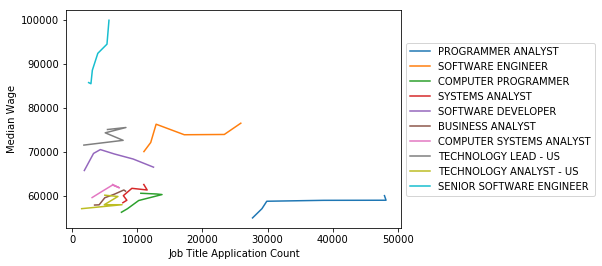

corr_list =  [0.75593794392683455, 0.58935932132823743, 0.87248060708637898, 0.79147678564480684, -0.20490693382774006, 0.97057714617343638, 0.89115825507038759, 0.5764062870016794, 0.49113233807394058, 0.95742462272021278]


In [24]:
'''
Plotting a graph depicting the correlation between the count of top 10 job titles applications over the years
and their yearly median wage to identiy trends
'''

import matplotlib.pyplot as plt

corr_list = []

for i in top_job_titles_overall_list:
    temp_df = main_df.loc[main_df['JOB_TITLE'] == i]
    temp_count = temp_df['COUNT'].values.tolist()
    temp_wage = temp_df['MEDIAN_WAGE'].values.tolist()
    corr_list.append(temp_df['COUNT'].corr(temp_df['MEDIAN_WAGE']))
    plt.plot(temp_count, temp_wage)
    
plt.ylabel('Median Wage')
plt.xlabel('Job Title Application Count')
plt.legend(top_job_titles_overall_list, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
print("corr_list = ", corr_list)

In [25]:
'''
Splitting the WORKSITE column into two distinct columns called CITY and STATE
'''

loc_df = pd.DataFrame(df['WORKSITE'].str.split(',',1).tolist(),columns = ['CITY', 'STATE'])
df = df.drop(['WORKSITE'], axis=1)
merged_df = pd.concat([df, loc_df], axis=1)
merged_df

,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,CITY,STATE
0,QUICKLOGIX LLC,CHIEF EXECUTIVES,CEO,1,187200.00,2016,SANTA CLARA,CALIFORNIA
1,"MCCHRYSTAL GROUP, LLC",CHIEF EXECUTIVES,"PRESIDENT, NORTHEAST REGION",1,241842.00,2016,ALEXANDRIA,VIRGINIA
2,"LOMICS, LLC",CHIEF EXECUTIVES,CEO,1,99986.00,2016,SAN DIEGO,CALIFORNIA
3,UC UNIVERSITY HIGH SCHOOL EDUCATION INC.,CHIEF EXECUTIVES,CHIEF FINANCIAL OFFICER,1,99986.00,2016,CHULA VISTA,CALIFORNIA
4,"QUICKLOGIX, INC.",CHIEF EXECUTIVES,CEO,1,187200.00,2016,SANTA CLARA,CALIFORNIA
5,HELLO INC.,CHIEF EXECUTIVES,CHIEF BUSINESS OFFICER,1,215862.00,2016,SAN FRANCISCO,CALIFORNIA
6,UMBEL CORP,CHIEF EXECUTIVES,VICE PRESIDENT OF ENGINEERING,1,192088.00,2016,AUSTIN,TEXAS
7,"PERSPECTIVES OF FREEDOM FOUNDATION, INC",CHIEF EXECUTIVES,EXECUTIVE DIRECTOR,1,95295.98,2016,WESTON,FLORIDA
8,GTH INC.,CHIEF EXECUTIVES,"VICE PRESIDENT, BUSINESS DEVELOPMENT",1,149594.00,2016,WASHINGTON,DISTRICT OF COLUMBIA
9,THE KRAFT HEINZ COMPANY,CHIEF EXECUTIVES,HEAD OF US SALES,1,226699.00,2016,CHICAGO,ILLINOIS


In [26]:
'''
Create a mapping dictionary where SOC_NAME values are keys and corresponding JOB_TITLE attributes are values
'''

unique_soc_name_list = df['SOC_NAME'].unique()
mapping_dict = {}

# for i in range(len(unique_soc_name_list)):
#     temp_df = df.loc[df['SOC_NAME'] == unique_soc_name_list[i]]
#     temp_list = temp_df['JOB_TITLE'].unique().tolist()
#     mapping_dict[unique_soc_name_list[i]] = temp_list

# with open("mapping_dict.pkl", "wb") as f:
#     pickle.dump(mapping_dict, f)

with open("mapping_dict.pkl", "rb") as f:
    mapping_dict = pickle.load(f)

In [27]:
'''
Convert the mapping dictionary into a dataframe
'''

soc_map_df = pd.DataFrame(list(mapping_dict.items()),columns=['SOC_NAME','JOB_TITLE'])
soc_map_df

,SOC_NAME,JOB_TITLE
0,CHIEF EXECUTIVES,"[CEO, PRESIDENT, NORTHEAST REGION, CHIEF FINAN..."
1,GENERAL AND OPERATIONS MANAGERS,"[CORPORATE DEVELOPMENT DIRECTOR, VICE PRESIDEN..."
2,GENERAL AND OPERATIONS MANAGER,"[DIRECTOR OF GLOBAL SOURCING, DIRECTOR OF PROD..."
3,GENERAL AND OPERATIONS MANAGERSE,[PROJECT MANAGER]
4,ADVERTISING AND PROMOTIONS MANAGERS,"[HEAD OF BUSINESS DEVELOPMENT, PRODUCT MARKETI..."
5,MARKETING MANAGERS,"[SENIOR MANAGER, BUSINESS STRATEGY & OPERATION..."
6,MARKETING MANAGER,"[SENIOR B2B PRODUCT MANAGER, PRODUCT MARKETING..."
7,SALES MANAGERS,"[SALES MANAGER, LATIN AMERICA, VP SALES & BUS ..."
8,SALES MANAGER,"[VP-SALES AND OPERATIONS, BUSINESS DEVELOPMENT..."
9,SALES MANGERS,[SENIOR MANAGER SOLUTIONS ENGINEER]


In [28]:
'''
Saving the mapping dataframe as excel file
'''

# writer = pd.ExcelWriter('soc_mapping.xlsx')
# soc_map_df.to_excel(writer,'Sheet1')
# writer.save()

In [29]:
'''
Load the mapped_courses excel file into a dataframe and perform cleaning on it
'''

mapped_courses = pd.read_excel("mapped_courses.xlsx")
mapped_courses = mapped_courses[mapped_courses.columns.drop(list(mapped_courses.filter(regex='Unnamed')))]
mapped_courses = mapped_courses.drop(['JOB_TITLE'], axis=1)
mapped_courses

,SOC_NAME,COURSES
0,CHIEF EXECUTIVES,EXECUTIVE MBA
1,GENERAL AND OPERATIONS MANAGERS,EXECUTIVE MBA
2,GENERAL AND OPERATIONS MANAGER,EXECUTIVE MBA
3,GENERAL AND OPERATIONS MANAGERSE,EXECUTIVE MBA
4,ADVERTISING AND PROMOTIONS MANAGERS,EXECUTIVE MBA
5,MARKETING MANAGERS,MASTER OF BUSINESS ADMINISTRATION
6,MARKETING MANAGER,MASTER OF BUSINESS ADMINISTRATION
7,SALES MANAGERS,MASTER OF BUSINESS ADMINISTRATION
8,SALES MANAGER,MASTER OF BUSINESS ADMINISTRATION
9,SALES MANGERS,MASTER OF BUSINESS ADMINISTRATION


In [30]:
'''
Merge the mapped_courses dataframe with merged_df based on SOC_NAME column values
'''

merged_df = pd.merge(merged_df, mapped_courses, on='SOC_NAME')
merged_df

,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,CITY,STATE,COURSES
0,QUICKLOGIX LLC,CHIEF EXECUTIVES,CEO,1,187200.00,2016,SANTA CLARA,CALIFORNIA,EXECUTIVE MBA
1,"MCCHRYSTAL GROUP, LLC",CHIEF EXECUTIVES,"PRESIDENT, NORTHEAST REGION",1,241842.00,2016,ALEXANDRIA,VIRGINIA,EXECUTIVE MBA
2,"LOMICS, LLC",CHIEF EXECUTIVES,CEO,1,99986.00,2016,SAN DIEGO,CALIFORNIA,EXECUTIVE MBA
3,UC UNIVERSITY HIGH SCHOOL EDUCATION INC.,CHIEF EXECUTIVES,CHIEF FINANCIAL OFFICER,1,99986.00,2016,CHULA VISTA,CALIFORNIA,EXECUTIVE MBA
4,"QUICKLOGIX, INC.",CHIEF EXECUTIVES,CEO,1,187200.00,2016,SANTA CLARA,CALIFORNIA,EXECUTIVE MBA
5,HELLO INC.,CHIEF EXECUTIVES,CHIEF BUSINESS OFFICER,1,215862.00,2016,SAN FRANCISCO,CALIFORNIA,EXECUTIVE MBA
6,UMBEL CORP,CHIEF EXECUTIVES,VICE PRESIDENT OF ENGINEERING,1,192088.00,2016,AUSTIN,TEXAS,EXECUTIVE MBA
7,"PERSPECTIVES OF FREEDOM FOUNDATION, INC",CHIEF EXECUTIVES,EXECUTIVE DIRECTOR,1,95295.98,2016,WESTON,FLORIDA,EXECUTIVE MBA
8,GTH INC.,CHIEF EXECUTIVES,"VICE PRESIDENT, BUSINESS DEVELOPMENT",1,149594.00,2016,WASHINGTON,DISTRICT OF COLUMBIA,EXECUTIVE MBA
9,THE KRAFT HEINZ COMPANY,CHIEF EXECUTIVES,HEAD OF US SALES,1,226699.00,2016,CHICAGO,ILLINOIS,EXECUTIVE MBA


In [31]:
'''
Remove leading and trailing spaces from the dataframe
'''

selection = merged_df.select_dtypes(['object'])
merged_df[selection.columns] = selection.apply(lambda x: x.str.strip())

In [32]:
'''
Group data based on all columns except COURSES
'''

count_merged_df = merged_df.groupby(['SOC_NAME','JOB_TITLE','CITY','STATE','COURSES'], sort=False).size().reset_index(name='COUNT')
count_merged_df

,SOC_NAME,JOB_TITLE,CITY,STATE,COURSES,COUNT
0,CHIEF EXECUTIVES,CEO,SANTA CLARA,CALIFORNIA,EXECUTIVE MBA,2
1,CHIEF EXECUTIVES,"PRESIDENT, NORTHEAST REGION",ALEXANDRIA,VIRGINIA,EXECUTIVE MBA,2
2,CHIEF EXECUTIVES,CEO,SAN DIEGO,CALIFORNIA,EXECUTIVE MBA,2
3,CHIEF EXECUTIVES,CHIEF FINANCIAL OFFICER,CHULA VISTA,CALIFORNIA,EXECUTIVE MBA,1
4,CHIEF EXECUTIVES,CHIEF BUSINESS OFFICER,SAN FRANCISCO,CALIFORNIA,EXECUTIVE MBA,2
5,CHIEF EXECUTIVES,VICE PRESIDENT OF ENGINEERING,AUSTIN,TEXAS,EXECUTIVE MBA,1
6,CHIEF EXECUTIVES,EXECUTIVE DIRECTOR,WESTON,FLORIDA,EXECUTIVE MBA,1
7,CHIEF EXECUTIVES,"VICE PRESIDENT, BUSINESS DEVELOPMENT",WASHINGTON,DISTRICT OF COLUMBIA,EXECUTIVE MBA,1
8,CHIEF EXECUTIVES,HEAD OF US SALES,CHICAGO,ILLINOIS,EXECUTIVE MBA,1
9,CHIEF EXECUTIVES,CHIEF FINANCIAL OFFICER,MORRISVILLE,NORTH CAROLINA,EXECUTIVE MBA,1


In [33]:
'''
Get count of each class in Target variable
'''

count_merged_df['COURSES'].value_counts()

COMPUTER SCIENCE                                  490707
MASTER OF BUSINESS ADMINISTRATION                  92783
MBBS                                               59229
MASTER OF ARTS IN TEACHING                         31426
FINANCIAL ENGINEERING                              26167
MANAGEMENT INFORMATION SYSTEMS                     22189
MECHANICAL ENGINEERING                             22043
COMMERCE                                           22010
CHARTERED ACCOUNTANT                               20765
BIOMEDICAL ENGINEERING                             18102
ELECTRICAL ENGINEERING                             17842
CIVIL ENGINEERING                                  14584
INDUSTRIAL ENGINEERING                             14443
GENERAL ENGINEERING                                13361
ELECTRONICS AND TELECOMMUNICATIONS ENGINEERING     13297
APPLIED SCIENCES                                   10999
MASTER OF ARTS                                     10025
ARCHITECTURE                   

In [34]:
'''
Converting string data type classes in Target variable to numeric type
'''

le_courses = preprocessing.LabelEncoder()
courses_encoded = le_courses.fit_transform(count_merged_df['COURSES'])

In [36]:
'''
Converting string type data in Target variable to numeric type
'''

X_feature = count_merged_df.loc[:, count_merged_df.columns!='COURSES']
X_dict = X_feature.T.to_dict().values()
feature_hasher = feature_extraction.FeatureHasher()
X_vector = feature_hasher.fit_transform(X_dict)

In [37]:
'''
Split the dataframe into training and testing dataframes
'''

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X_vector, courses_encoded, test_size=0.4, random_state=1)

In [38]:
'''
Fit Random Forest Classifier with training data
'''

rfc = RandomForestClassifier(n_estimators=100, min_samples_split=5, min_samples_leaf=5, n_jobs=-1, random_state=1, oob_score=True)
rfc = rfc.fit(X_train, Y_train)
rfc

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=True, random_state=1, verbose=0, warm_start=False)

In [40]:
'''
Compute accuracy of the model by predicting test data values
'''

Y_prediction = rfc.predict(X_test)
print("Accuracy in test dataset : ", metrics.accuracy_score(Y_test, Y_prediction)*100)

Y_prediction = rfc.predict(X_train)
print("Accuracy in train dataset : ", metrics.accuracy_score(Y_train, Y_prediction)*100)

Accuracy in test dataset :  86.6723576401
Accuracy in train dataset :  86.8606609223
